## Table of Contents

1. [Introduction to T- Test](#section1)<br>               
2. [Analysis](#section2)<br/>
     -  2.1 [Two Independent Sample T-Test](#section201)<br/>
         - 2.1.1 [Hypothesis Statement](#sectiona)<br/>
         - 2.1.2 [Implementation](#sectionb)<br/>
     -  2.2 [Non-Parametric Test ](#section202)<br/>
         - 2.2.1 [Spearman Coefficient](#sectionc)<br/>
         - 2.2.2 [Implementation](#sectiond)<br/>
     -  2.3 [One Sample Test ](#section203)<br/>
         - 2.3.1 [Hypothesis ](#sectione)<br/>
         - 2.3.2 [Implementation](#sectionf)<br/>
     -  2.4 [Two Sample Test ](#section204)<br/>
         - 2.3.2 [UnPaired](#sectionh)<br/>
         - 2.3.3 [Paired](#sectioni)<br/>

<a id=section1></f> 
## 1.Introduction to T-Test

The T-test is a **statistical significance** test used to determine whether a numeric data sample differs significantly from the population or whether two groups have different average values (for example, whether men and women have different average heights).
Statistical significance is determined by the **size** of the difference between the group **averages**, the **sample size**, and the **standard deviations** of the groups.

### Why we do t-test?

- To make inference about population beyond our data
- To check whether the difference between means of **two Samples** is reliable
- Comparing Machine Learning Algorithms


<a id=section2></f> 
## <center> Analysis </center>
<a id=section201></z> 
## Two Independent Sample T-test

The independent  t-test is used to test whether population means are **significantly different** from each other, using the means from randomly drawn samples.


### What do you need to run an independent t-test?
In order to run an independent t-test, you need the following:
One independent, categorical variable that has two levels/groups.
One continuous dependent variable.

<a id=sectiona></a>
### Hypothesis Statement:

The null hypothesis for the independent t-test is that the population means from the two unrelated groups are equal:
H0: u1 = u2

From a sample of Employee data(fictious data) lets find signifance of relationship between **Gender**,**Performance** & **Work life balance** in company.
-  H<sub>0</sub> : mean1=mean2
-  H<sub>A</sub> : mean1!mean2

### Which error would you say is more serious?
- A false positive (type I error) — when you reject a true null hypothesis
- A false negative (type II error) — when you accept a false null hypothesis

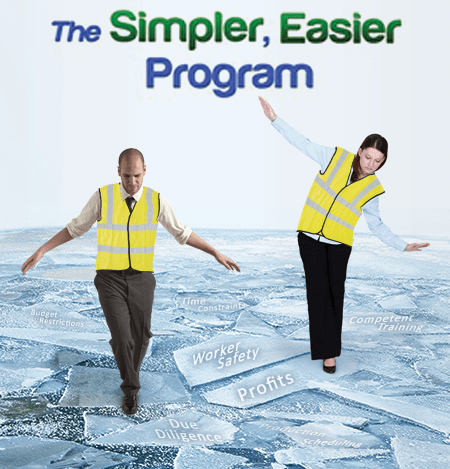

### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import csv
import seaborn as sns
from scipy.stats import ttest_ind #to run the t-test for independent samples
from scipy import stats
from scipy.stats import spearmanr #to run spearman
%matplotlib inline
emp_data = pd.read_excel("Emp_data.xlsx")

In [72]:
emp_data.head()

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2019)
0,Female,1,Sales,8,1.0,2,6,24000,24000
1,Female,5,Research,8,3.0,2,8,24000,24000
2,Female,10,Content Writing,12,2.0,2,1,24000,24000
3,Female,15,Content Writing,10,3.0,2,9,24000,24000
4,Female,20,Sales,10,3.0,2,10,24000,24000


In [52]:
#first dividing the test into two groups of cases based on gender
F = emp_data[emp_data['Gender']=='Female']
M = emp_data[emp_data['Gender']=='Male']

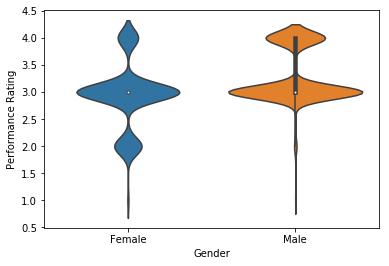

In [53]:
sns.violinplot(x="Gender", y="Performance Rating", data=emp_data)

In [54]:
ttest_ind(M['Performance Rating'], F['Performance Rating'], nan_policy='omit')

Ttest_indResult(statistic=12.384599325080652, pvalue=1.4111961223428144e-33)

### Insight 
- The **t score(Statistic)** is a ratio between the difference between two groups and the difference within the groups.
- We have  **t-score** in favour of **Null** hypothesis as it is greater than 1
- As **p value** is greater than **0.05(1.4)** there is **Significant difference** between Genders and Performance Rating.

#### Accept Null Hypotheis : So the difference is  significant

###  Lets check if there is  significant difference between males ,females & Work life Balance

In [55]:
#let's see if there are differences in Work Life Balance 
ttest_ind(M['Work Life Balance'], F['Work Life Balance'], nan_policy='omit')

Ttest_indResult(statistic=2.7963096216757348, pvalue=0.005236371539080133)

### Insight 
As p value is less than **0.05(0.85)** ,so Gender and Work life Balance there is  **no significant  difference** between two groups.


#### Let's visualize the distribution of men according to Performance rating  since this was significant

In [56]:

M_Performance = M['Performance Rating'].value_counts()
print(M_Performance)

3    603
4    267
2     11
1      1
Name: Performance Rating, dtype: int64


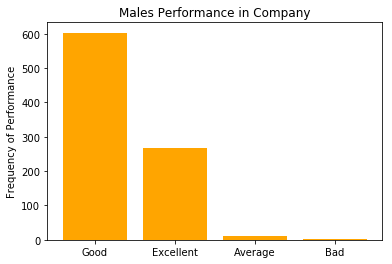

In [57]:
objects = ('Good', 'Excellent', 'Average','Bad',)
y_pos = np.arange(len(objects))
performance = [603,267,11,1]
 
plt.bar(y_pos, performance, align='center', color = 'orange')
plt.xticks(y_pos, objects)
plt.ylabel('Frequency of Performance')
plt.title('Males Performance in Company')
 
plt.show()

#### Let's visualize the distribution of women according to Performance rating  since this was significant

In [58]:

F_Performance = F['Performance Rating'].value_counts()
print(F_Performance)

3    399
2    106
4     79
1      4
Name: Performance Rating, dtype: int64


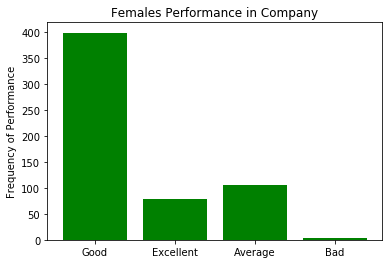

In [59]:
objects = ('Good', 'Excellent', 'Average','Bad',)
y_pos = np.arange(len(objects))
performance = [399,79,106,4]
 
plt.bar(y_pos, performance, align='center', color = 'green')
plt.xticks(y_pos, objects)
plt.ylabel('Frequency of Performance')
plt.title('Females Performance in Company')
 
plt.show()

<a id=section202></f> 
## Non-Parametric Test</br>

This is test in which even looking at data we don't have any Idea about polulation parameter.

<a id=sectiond></a> 
### Spearman 

Measures the strength of **association** between two variables and direction of **relationship (positive , negative or no-relation)**.

#### Why Spearman?
- We run spearman's r correlations to find relation between variables 
- This test is applicable for **norminal** & **ordinal** categorical data.
- The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of the two variables. 
- The range of values for the correlation coefficient bounded by 1.0 on an absolute value basis or between -1.0 to 1.0.

H<sub>0</sub> : There is no association between WorkLife Balance & Performance Rating

#### Lets use Spearman test Relation between Work Life Balance & Performance Rating

In [60]:
x = (emp_data['Work Life Balance'])
y = (emp_data['Performance Rating'])
spearmanr(x,y)

SpearmanrResult(correlation=0.032433698138573629, pvalue=0.21394305781473666)

**Insight**
- **No  significant** association between Work Life Balance & Performance Rating 
- Favours **Alternate** hypothesis

In [62]:
x = (emp_data['Skills'])
y = (emp_data['MonthlyIncome(June-2018)'])
spearmanr(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.066241173232845146, pvalue=0.01107400346011593)

**Insight**
- **Negative** Correlation between Skills  & Monthly Income
- Favours **Null** hypothesis

<a id=section203></f>
## One-Sample T-Test



 A One sample t-test tests the mean of a **single** group against a known **mean**.
 <a id=section203></a>
 ### Hypothesis Statements
 - H<sub>0</sub> : Average salary of employees matches population mean


In [63]:
pop = emp_data['MonthlyIncome(June-2018)'] # population mean for 2019

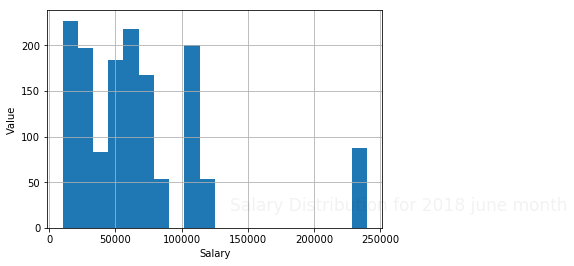

In [64]:
plt=emp_data['MonthlyIncome(June-2018)'].hist(bins=20)
plt.set_ylabel('Value')
plt.set_xlabel('Salary')
plt.set_title('Salary Distribution for 2018 june month',size=17, y=.05,x=1.05,alpha=0.05)

In [65]:
samp=emp_data['MonthlyIncome(June-2018)']

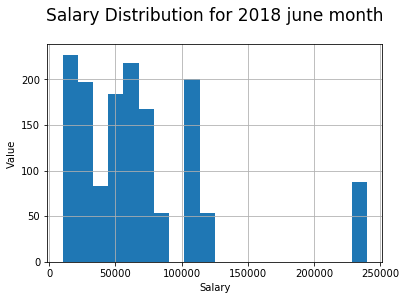

In [66]:
plt=emp_data['MonthlyIncome(June-2018)'].hist(bins=20)
plt.set_ylabel('Value')
plt.set_xlabel('Salary')
plt.set_title('Salary Distribution for 2018 june month',size=17, y=1.08)

#### Lets Check significance of difference between given means

In [67]:
stats.ttest_1samp(a=samp,popmean=pop.mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

**Insight**
- As p -value value greater than **0.05** so **Accept null**

#### There is no significant difference

#### Hence we can conclude the average salary of employees matches population mean.


<a id=section204></f>
## Two-Sample T-Test

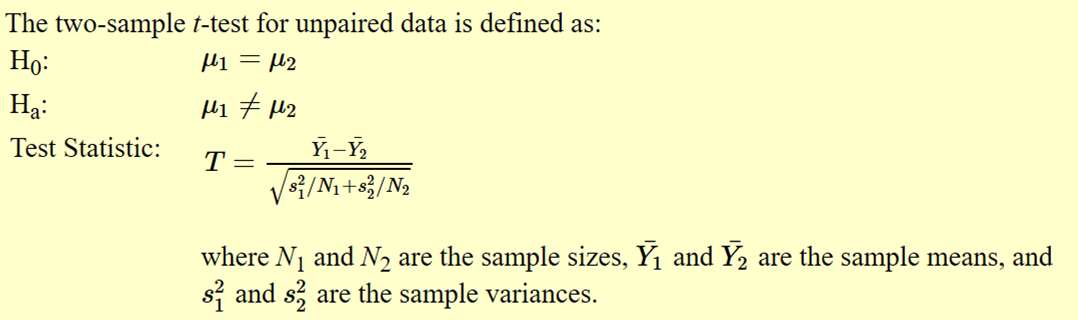

### Employee skill set across the company

In [68]:
F_Skills = F['Skills'].value_counts()
print(F_Skills)

Sales                     242
Research                  114
Content Writing            85
Employee relations         51
Workforce Management       47
Delivery                   33
Performance Management     16
Name: Skills, dtype: int64


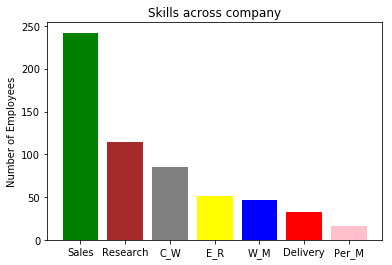

In [74]:
objects = labels = ['Sales', 'Research', 'C_W', 'E_R','W_M','Delivery','Per_M']
y_pos = np.arange(len(objects))
performance = [242,114,85,51,47,33,16]
colors = ['green', 'brown', 'gray', 'yellow','blue','red','pink']
plt.bar(y_pos, performance, align='center', color = colors)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Employees')
plt.title('Skills across company')
 
plt.show()

<a id=sectionh></a>
### Unpaired  T-Test
A Two sample t-test  tests the mean of two groups against a known mean.

- **H<sub>0</sub>= Mean of monthly incomes is same in Sales & Delivery  skills**


In [80]:
Sales = emp_data.loc[emp_data['Skills'] == 'Sales','MonthlyIncome(June-2018)']
Delivery = emp_data.loc[emp_data['Skills'] == 'Delivery','MonthlyIncome(June-2018)']

#### Two T-test to check whether the salary mean  for Sales Skills is different from Delivery Skills


In [81]:
stats.ttest_ind(a=Sales,
                b=Delivery,
                equal_var=False) 

Ttest_indResult(statistic=0.69020844566390438, pvalue=0.49165517453973573)

**Insight**
- As p value is **JUST EQUAL ** TO **0.05 (0.49)** , so **Accept null Hypothesis***

#### Mean Salary of Employees in Sales & Delivery has not a  Significant difference

<a id=sectioni></a>
### Paired T-Test

A Two sample t-test within a group at different points of time.

**H<sub>0</sub> = Mean of Average Income for Females is same as in previous year(2018)**.
   
- (Previous year Income Mean)μ<sub>1</sub> 
   
- ( This year Income Mean) μ<sub>2</sub>
        μ1 - μ2 = 0      

In [77]:
f2018_income = emp_data.loc[emp_data['Gender'] == 'Female','MonthlyIncome(June-2018)']
f2019_income = emp_data.loc[emp_data['Gender'] == 'Female','MonthlyIncome(June-2019)']

In [79]:
stats.ttest_rel(a=f2018_income,
                b=f2019_income
                ) 

Ttest_relResult(statistic=-6.9783455035567119, pvalue=8.0934320719730482e-12)

**Insight**
- As p value is less than **0.05(8.09)**,so **Reject null Hypothesis** 

#### Mean of Average Income for Females is different as in previous year (difference is significant)